
¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-warning">

<b>Comentario del revisor</b> <a class="tocSkip"></a>


Abraham, cuando hacemos análisis de datos es muy útil escribir una introducción al proyecto donde se especifiquen claramente los objetivos y se explique el propósito del mismo. Es esencial hacer esto para establecer las bases del proyecto y aclarar lo que buscamos alcanzar. Con la introducción, queda de manera clarar el análisis que desarrollaremos en el proyecto y cómo lo pretendemos abordar.</div>

### Análisis de uso de servicios de Taxi en Chicago ###
En este pequeño proyecto se analiza el uso y duración de los viajes en taxi por los habitantes de Chicado en el año 2017, específicamente en Noviembre. Se pretende entender el consumo de tiempo de los viajes en función del clima, las colonias que hacen mayor uso del servicio de taxi y las principales empresas que ofrecen el servicio de taxi. 

In [1]:
# Importación de las librerías necesarias para este análisis.

import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib as plt
import os
from scipy import stats as st

## Extracción de datos. 
Para este proyecto se requiere la minería de datos de una página web. 

In [2]:
## Desacarga de datos para su uso posterior. 
## Extracción de información y acomodo del código fuente con BeatifulSoup
url = 'https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html'
req = requests.get(url)
soup = BeautifulSoup(req.text, 'lxml')
print(req.text)
## Revisión y extracción de los datos para almacenarlos en objetos Series
table_heads = []
for row in soup.find_all('th'):
    table_heads.append(row.text)
print(table_heads)
content = []
for row in soup.find_all('tr'):
    if not row.find_all('th'):
        content.append(element.text for element in row.find_all('td'))
print(content)

<html>
<head>
    <link rel="stylesheet" href="./styles.css">
    <title>
        Festival News
    </title>
</head>
<body>
<h2>Chicago Weather Records, November 2017</h2>
       <table border="1" class="dataframe" id="weather_records">
  <thead>
    <tr style="text-align: right;">
      <th>Date and time</th>
      <th>Temperature</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>2017-11-01 00:00:00</td>
      <td>276.150</td>
      <td>broken clouds</td>
    </tr>
    <tr>
      <td>2017-11-01 01:00:00</td>
      <td>275.700</td>
      <td>scattered clouds</td>
    </tr>
    <tr>
      <td>2017-11-01 02:00:00</td>
      <td>275.610</td>
      <td>overcast clouds</td>
    </tr>
    <tr>
      <td>2017-11-01 03:00:00</td>
      <td>275.350</td>
      <td>broken clouds</td>
    </tr>
    <tr>
      <td>2017-11-01 04:00:00</td>
      <td>275.240</td>
      <td>broken clouds</td>
    </tr>
    <tr>
      <td>2017-11-01 05:00:00</td>
      <td>275.050</td>
 

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo con la extracción de la información de la página web, así como la sistemación de la ifnormación en una base de datos de la cual ya podemos hacer análisis. En el mundo laboral esto te será de mucha utilidad dado que en ocasiones la unica manera de contar datos es con la extracción de datos de páginas web.</div>

In [3]:
## Creación de DataFrame con la informacón extraída de la página web
Nov_weather_rec = pd.DataFrame(content, columns=table_heads)
print(Nov_weather_rec)
Nov_weather_rec.info()
print(Nov_weather_rec.duplicated().value_counts())

           Date and time Temperature       Description
0    2017-11-01 00:00:00     276.150     broken clouds
1    2017-11-01 01:00:00     275.700  scattered clouds
2    2017-11-01 02:00:00     275.610   overcast clouds
3    2017-11-01 03:00:00     275.350     broken clouds
4    2017-11-01 04:00:00     275.240     broken clouds
..                   ...         ...               ...
692  2017-11-29 20:00:00     281.340        few clouds
693  2017-11-29 21:00:00     281.690      sky is clear
694  2017-11-29 22:00:00     281.070        few clouds
695  2017-11-29 23:00:00     280.060      sky is clear
696  2017-11-30 00:00:00     278.460      sky is clear

[697 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date and time  697 non-null    object
 1   Temperature    697 non-null    object
 2   Description    697 non-null    obje

Nuestro dataframe contiene tres columnas, ninguna con valores nulos ni duplicados, el unico ajuste necesario es el cambio del tipo de datos de la columna 'Date and time'. 

In [4]:
## Ajuste de columna 'Date and time' a tipo de dato adecuado.
Nov_weather_rec['Date and time'] = pd.to_datetime(arg=Nov_weather_rec['Date and time'], format='%Y-%m-%d %H:%M:%S')
Nov_weather_rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date and time  697 non-null    datetime64[ns]
 1   Temperature    697 non-null    object        
 2   Description    697 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 16.5+ KB


## Datasets extraídos con SQL
En esta sección se hace el cargado y análisis de los datasets extraídos por medio de lenguaje SQL dentro del servidor de TripleTen.

In [5]:
## Cargado del primer resultado y generación de DataFrame
current_path = os.getcwd()
result_01_path = os.path.join(current_path, 'moved_project_sql_result_01.csv')
result_01_df = pd.read_csv(result_01_path)
result_01_df.info()
print('------------------------')
print(result_01_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
------------------------
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299


                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                   Medallion Leasin         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953


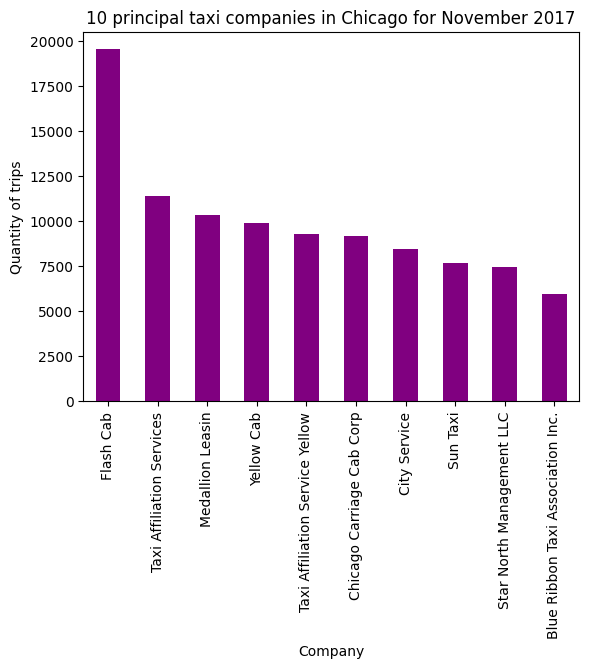

In [6]:
## Orden de los datos de mayor a menor, escritura de listado top 10 y gráfico comparativo entre las empresas presentes en Chicago.
r1_sort = result_01_df.sort_values(by='trips_amount', ascending=False)
r1_sort.head(10).plot(kind='bar', x='company_name', y='trips_amount', xlabel='Company', ylabel='Quantity of trips', legend=False, color='purple', title='10 principal taxi companies in Chicago for November 2017', rot=90)
print(r1_sort.head(10))

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo con el desarrollo de este análisis, muestras de manera clara cuales son los 10 principales barrios en términos de finalización del recorrido
    </div>

Con nuestros resultados podemos reconocer las 10 principales empresas que realizan viajes en Chicago, aunque estas están limitadas al mes de Noviembre, nos da un indicio de la preferencia de los habitantes de Chicago, sería interesante tener un dataset más grande que nos permitiera reconocer el valor agregado por cada empresa o las razones de las preferencias de los clientes. Por ahora podemos concluir que Flash Cab y Taxi Affilation Services son las empresas de taxis más exitosas en Chicago para el mes referido en el año 2017.

In [7]:
## Cargado del 4 resultado y generación de DataFrame
result_04_path = os.path.join(current_path, 'moved_project_sql_result_04.csv')
result_04_df = pd.read_csv(result_04_path)
result_04_df.info()
print('---------------------------')
print(result_04_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
---------------------------
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


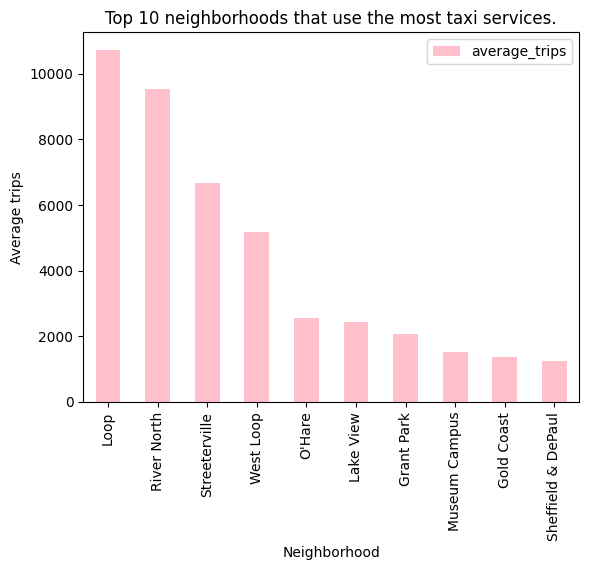

In [8]:
# Orden de los datos de mayor a menor para la columna 'average_trips', escritura de listado top 10 y gráfico comparativo entre las colonias que usan mas 
# el servicio de taxi en Chicago.
r4_sort = result_04_df.sort_values(by='average_trips', ascending=False)
r4_sort.head(10).plot(kind='bar', x='dropoff_location_name', xlabel='Neighborhood', y='average_trips', ylabel='Average trips', title='Top 10 neighborhoods that use the most taxi services.', color='pink')
print(r4_sort.head(10))

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo con el desarrollo de este análisis y lo complementaste con una gráfica.
    </div>

La diferencia entre el consumo de este tipo de servicios es abismal entre la localidad que más consume y la décima localidad, los habitantes de la localidad Loop son los mayores consumidores de ek servicio de taxis con un promedio mensual de 10727.46667 viajes, mientras que la comunidad Sheffield & DePaul es de 1259.766667 viajes mensuales. 
Esto nos plantea más preguntas que se resolverían con datasets ue contengas mayor información respecto a estos viajes.

In [9]:
## Cargado de séptimo resultado, creación de DataFrame y corrección de tipo de dato para la columna 'start_ts'
result_07_path = os.path.join(current_path, 'moved_project_sql_result_07.csv')
result_07_df = pd.read_csv(result_07_path)
result_07_df.info()
print('--------------------------------')
print(result_07_df.head())
result_07_df['start_ts'] = pd.to_datetime(result_07_df['start_ts'], format='%Y-%m-%d %H:%M:%S')
print('--------------------------------')
result_07_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
--------------------------------
              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0
--------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ---

In [10]:
# Combinación de datasets Nov_weather_rec & result_07_df.
trips_weather_cond = result_07_df.merge(Nov_weather_rec, left_on='start_ts', right_on='Date and time', how='left').drop(
    columns=['Date and time', 'Temperature'])
trips_weather_cond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
 3   Description         1068 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 33.5+ KB


In [11]:
# Rvisión de las condiciones del clima en base a las condiciones Bad = rain|storm Good = el resto de climas
sat_df = trips_weather_cond[trips_weather_cond['start_ts'].dt.dayofweek==5]
print(sat_df['weather_conditions'].unique())

['Good' 'Bad']


Esto nos indica que al menos si existen días de referencia con las diferentes condiciones climáticas necesarias para la elaboración y prueba de una hipótesis que relacione el clima de un mismo día de la semana con la duración de los viajes solicitados.

Cabe resaltar que en este DataSet obtenemos los viajes que se hicierondesde el Loop hasta el Aeropuerto Internacional O'Hare.

## Prueba de hipótesis.
"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos"

Hipótesis nula (H0): El promedio de duración de los viajes en sábado con un clima diferente a la lluvia es exactamente igual a los viajes en los sábados con clima lluvioso.

Hipótesis alternativa (H1): El promedio de duración de los viajes entre los sabados lluviosos y los que es mayor o menor en un 5%. 

In [19]:
sat_good = sat_df[sat_df['weather_conditions']=='Good']
sat_bad = sat_df[sat_df['weather_conditions']=='Bad']
t_result, p = st.levene(sat_good['duration_seconds'], sat_bad['duration_seconds'])
print("Valor P de la prueba Levene: ", p)
if p > a:
    print('Podemos inferir que las varianzas entre los dos grupos son iguales.')
else: 
    print('Hay evidencia suficiente para asumir que las varianzas no son iguales.') 
a = 0.05
print('--------------------------------------')
if p > a:
    result_t, p_value = st.ttest_ind(sat_good['duration_seconds'],
                                 sat_bad['duration_seconds'], equal_var=False)
else:
    result_t, p_value = st.ttest_ind(sat_good['duration_seconds'],
                                     sat_bad['duration_seconds'], equal_var=True)
print('P value: ', p_value)
if (p_value < a):
    print('Rechazamos H0')
else:
    print("No podemos rechazar H0")
print()
print('Promedio de duración de tiempo (s) cuando el clima se considera bueno: ', 
      sat_good['duration_seconds'].mean())
print('Promedio de duración de tiempo (s) cuando el clima se considera malo: ',
      sat_bad['duration_seconds'].mean())

Valor P de la prueba Levene:  0.5332038671974493
Podemos inferir que las varianzas entre los dos grupos son iguales.
--------------------------------------
P value:  6.738994326108734e-12
Rechazamos H0

Promedio de duración de tiempo (s) cuando el clima se considera bueno:  1999.6756756756756
Promedio de duración de tiempo (s) cuando el clima se considera malo:  2427.2055555555557


<div class="alert alert-block alert-info">
<b>Con la prueba de Levene se puede indicar que las varianzas son, cuanto menos, similares. </b> <a class="tocSkip"></a>

 <div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Para esta prueba te recomiendo hacer una prueba de  Levene  para mostrar si las varianzas son iguales y agregarlo dentro de la función. Actualmente lo colocas como equal_var=False. Para esto, primero debes calcular las varianzas para cada uno de los días (lluvioso y no lluvioso) debes de hacer uso de la siguiente función: 
    
    levene(rainy_saturday_trips['duration_seconds'], non_rainy_saturday_trips ['duration_seconds'])
    
Adoptaremos un nivel de significancia de 0.05; si el valor p resultante es mayor a 0.05, no podemos rechazar la hipótesis nula, y si es menor a 0.05, rechazamos la hipótesis nula, indicando que las varianzas no son iguales. 
    
Solamente recuerda que la prueba de levene no es sustituto a la prueba de st.ttest_ind, más bien es complemento para saber que colocar dentro del elemento "equal_var".  Es por eso que para terminar la prueba debes de realizar la prueba de st.ttest_ind considernado el resultado de la prueba realizada de levene.  
</div>

## Conclusión 
Con la información obtenida, reconocemos que el consumo de tiempo en los días donde el clima tiene una característica de precipitaciones es mayor frente a aquellos que no presentan dichas precipitaciones de agua. Puede ser un resultado evidente, pues frente a las condiciones del clima, las estrategias de conducción cambian, por lo que es normal que los viajes tiendan a ser más tardados con una diferencia arpoximada del doble de tiempo entre una condición climática u otra.

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

En general, considero que realizaste un excelente trabajo con el proyecto. Lograste limpiar y organizar las bases de datos eficazmente. Además, tu análisis exploratorio fue exhaustivo, presentando resultados relevantes que serán muy útiles para la toma de decisiones. También, desarrollaste las pruebas de hipótesis de manera acertada. Sin embargo, siempre hay espacio para mejorar y quisiera señalar algunos aspectos que podrías considerar:



    
*  Realizar análisis complementarios eliminando los valores que parecen ser atípicos.    
    
*  Considerar desarrollar un análisis para comprobar los supuestos de la prueba de hipótesis (varianzas iguales)
    
*  Profundizar en los resultados intermedios y en la conclusión final.
    
</div>